In [118]:
import pandas as pd

In [119]:
# importar csv dos dados de exercício
exercise_data = pd.read_csv('data\com.samsung.shealth.calories_burned.details.20241201154180.csv', skiprows=1, encoding='UTF-8')

In [120]:
# selecionar colunas com dados relevantes: pontuação de sono e data
exercise_data = exercise_data[['com.samsung.shealth.calories_burned.update_time', 'com.samsung.shealth.calories_burned.create_time']]

In [121]:
# renomear coluna de data e calorias para melhor visualização
exercise_data = exercise_data.rename(columns={
                                    'com.samsung.shealth.calories_burned.update_time': 'date',
                                    'com.samsung.shealth.calories_burned.create_time': 'calories_burned'})

In [122]:
# converter coluna de data para formato de data
exercise_data['date'] = pd.to_datetime(exercise_data['date'])

In [123]:
# filtrar pela mesma data que começam os dados de sono
exercise_data = exercise_data[exercise_data['date'] >= pd.to_datetime('2024-10-18')]

In [124]:
# ajustar formato de data para melhor visualização
exercise_data['date'] = exercise_data['date'].dt.strftime('%d/%m')

In [125]:
# ajustar o index e criar df agrupado pela data para tratar duplicatas,
# mantendo sempre a pontuação mais alta do dia
exercise_data.reset_index(inplace=True)
date_grouped = exercise_data.groupby('date')[['calories_burned']].max()

<Axes: xlabel='date'>

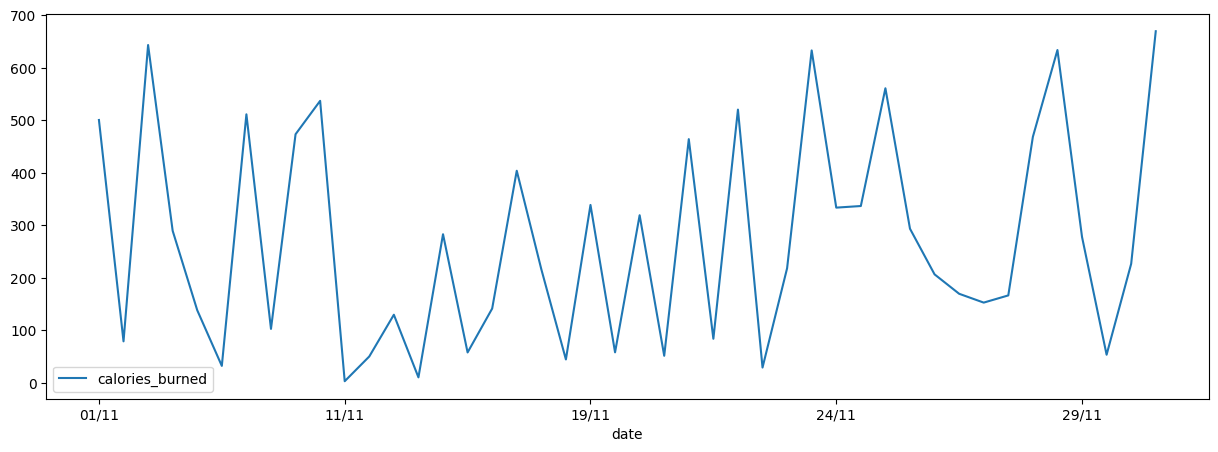

In [126]:
date_grouped.plot(figsize=(15,5), kind='line')

In [ ]:
# exportar os dados tratados de exercício
date_grouped.to_csv('exercise_treated_data.csv')